# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [28]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [29]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Booked a flight from Buchar...
1,✅ Trip Verified | Booked online months ago an...
2,✅ Trip Verified | The flight was on time. The...
3,"Not Verified | Angry, disappointed, and unsat..."
4,"✅ Trip Verified | As an infrequent flyer, Bri..."


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Text Cleaning

In [34]:
df.reviews = df.reviews.str.split('|' , expand=True)[1]

In [35]:
df

,reviews
0,Booked a flight from Bucharest to Manchester...
1,Booked online months ago and the only hitch ...
2,The flight was on time. The crew were polite...
3,"Angry, disappointed, and unsatisfied. My rou..."
4,"As an infrequent flyer, British Airways was ..."
...,...
995,\r\nVenice to London City. Really we had a g...
996,San Francisco to London. Terrible service an...
997,Heathrow to Vancouver. The seats booked not ...
998,London to Bucharest. First class ground staf...


In [36]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

In [38]:
df['Cleaned_Reviews'] = df['reviews'].apply(clean_text)

In [39]:
df

,reviews,Cleaned_Reviews
0,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester w...
1,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch wa...
2,The flight was on time. The crew were polite...,The flight was on time The crew were polite It...
3,"Angry, disappointed, and unsatisfied. My rou...",Angry disappointed and unsatisfied My route wa...
4,"As an infrequent flyer, British Airways was ...",As an infrequent flyer British Airways was alw...
...,...,...
995,\r\nVenice to London City. Really we had a g...,Venice to London City Really we had a great ex...
996,San Francisco to London. Terrible service an...,San Francisco to London Terrible service and f...
997,Heathrow to Vancouver. The seats booked not ...,Heathrow to Vancouver The seats booked not giv...
998,London to Bucharest. First class ground staf...,London to Bucharest First class ground staff b...


In [45]:
df.to_csv('data/BACleaned.csv', index=False)

In [51]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


In [53]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned_Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned_Reviews,original_tokens,POS tagged
0,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester w...,NaN,"[(Booked, v), (flight, n), (Bucharest, n), (Ma..."
1,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch wa...,NaN,"[(Booked, v), (online, a), (months, n), (ago, ..."
2,The flight was on time. The crew were polite...,The flight was on time The crew were polite It...,NaN,"[(flight, n), (time, n), (crew, n), (polite, a..."
3,"Angry, disappointed, and unsatisfied. My rou...",Angry disappointed and unsatisfied My route wa...,NaN,"[(Angry, n), (disappointed, v), (unsatisfied, ..."
4,"As an infrequent flyer, British Airways was ...",As an infrequent flyer British Airways was alw...,NaN,"[(infrequent, a), (flyer, n), (British, n), (A..."


In [58]:
import nltk
import matplotlib.pyplot as plt
import spacy
from nltk.tokenize.toktok import ToktokTokenizer
import unicodedata
nlp = spacy.load("en_core_web_sm")

In [59]:
def lemmatize_text(text):
    doc = nlp(text)
    doc = ' '.join([token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in doc])
    return doc


In [61]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Assuming 'df' is your DataFrame with 'POS tagged' column
for i, row in df.iterrows():
    # 'POS tagged' column assumed to be a list of tuples (word, POS)
    pos_tagged_list = row['POS tagged']
    
    # Extract words from the POS tagged list
    words = [word for word, _ in pos_tagged_list]
    
    # Join the words into a string
    text = ' '.join(words)
    
    # Lemmatize the text using spaCy
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in doc])
    
    # Store the lemmatized text in a new column, e.g., 'Lemma'
    df.at[i, 'Lemma'] = lemmatized_text

# Display the updated DataFrame
print(df[['POS tagged', 'Lemma']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            POS tagged  \
0    [(Booked, v), (flight, n), (Bucharest, n), (Ma...   
1    [(Booked, v), (online, a), (months, n), (ago, ...   
2    [(flight, n), (time, n), (crew, n), (polite, a...   
3    [(Angry, n), (disappointed, v), (unsatisfied, ...   
4    [(infrequent, a), (flyer, n), (British, n), (A...   
..                                                 ...   
995  [(Venice, n), (London, n), (City, n), (Really,...   
996  [(San, n), (Francisco, n), (London, n), (Terri...   
997  [(Heathrow, n), (Vancouver, v), (seats, n), (b...   
998  [(London, n), (Bucharest, n), (First, n), (cla...   
999  [(forgot, v), (purchased, v), (hand, n), (bagg...   

                                                 Lemma  
0    booked flight Bucharest Manchester 2h 45 layov...  
1    book online month ago hitch replacement aircra...  
2    flight time crew polite story outward flight f...  
3    angry disappoint unsatisfied route London Atla...  
4    infrequent fl

In [63]:
df

,reviews,Cleaned_Reviews,original_tokens,POS tagged,Lemma
0,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester w...,NaN,"[(Booked, v), (flight, n), (Bucharest, n), (Ma...",booked flight Bucharest Manchester 2h 45 layov...
1,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch wa...,NaN,"[(Booked, v), (online, a), (months, n), (ago, ...",book online month ago hitch replacement aircra...
2,The flight was on time. The crew were polite...,The flight was on time The crew were polite It...,NaN,"[(flight, n), (time, n), (crew, n), (polite, a...",flight time crew polite story outward flight f...
3,"Angry, disappointed, and unsatisfied. My rou...",Angry disappointed and unsatisfied My route wa...,NaN,"[(Angry, n), (disappointed, v), (unsatisfied, ...",angry disappoint unsatisfied route London Atla...
4,"As an infrequent flyer, British Airways was ...",As an infrequent flyer British Airways was alw...,NaN,"[(infrequent, a), (flyer, n), (British, n), (A...",infrequent flyer British Airways always first ...
...,...,...,...,...,...
995,\r\nVenice to London City. Really we had a g...,Venice to London City Really we had a great ex...,NaN,"[(Venice, n), (London, n), (City, n), (Really,...",Venice London City really great experience Bri...
996,San Francisco to London. Terrible service an...,San Francisco to London Terrible service and f...,NaN,"[(San, n), (Francisco, n), (London, n), (Terri...",San Francisco London terrible service food cra...
997,Heathrow to Vancouver. The seats booked not ...,Heathrow to Vancouver The seats booked not giv...,NaN,"[(Heathrow, n), (Vancouver, v), (seats, n), (b...",Heathrow Vancouver seat booked give take 3 mon...
998,London to Bucharest. First class ground staf...,London to Bucharest First class ground staff b...,NaN,"[(London, n), (Bucharest, n), (First, n), (cla...",London Bucharest first class ground staff air ...


In [77]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned_Reviews,original_tokens,POS tagged,Lemma,Sentiment,Analysis
0,Booked a flight from Bucharest to Manchester...,Booked a flight from Bucharest to Manchester w...,NaN,"[(Booked, v), (flight, n), (Bucharest, n), (Ma...",booked flight Bucharest Manchester 2h 45 layov...,-0.8500,Negative
1,Booked online months ago and the only hitch ...,Booked online months ago and the only hitch wa...,NaN,"[(Booked, v), (online, a), (months, n), (ago, ...",book online month ago hitch replacement aircra...,0.5248,Positive
2,The flight was on time. The crew were polite...,The flight was on time The crew were polite It...,NaN,"[(flight, n), (time, n), (crew, n), (polite, a...",flight time crew polite story outward flight f...,0.1531,Neutral
3,"Angry, disappointed, and unsatisfied. My rou...",Angry disappointed and unsatisfied My route wa...,NaN,"[(Angry, n), (disappointed, v), (unsatisfied, ...",angry disappoint unsatisfied route London Atla...,-0.6486,Negative
4,"As an infrequent flyer, British Airways was ...",As an infrequent flyer British Airways was alw...,NaN,"[(infrequent, a), (flyer, n), (British, n), (A...",infrequent flyer British Airways always first ...,-0.2960,Negative


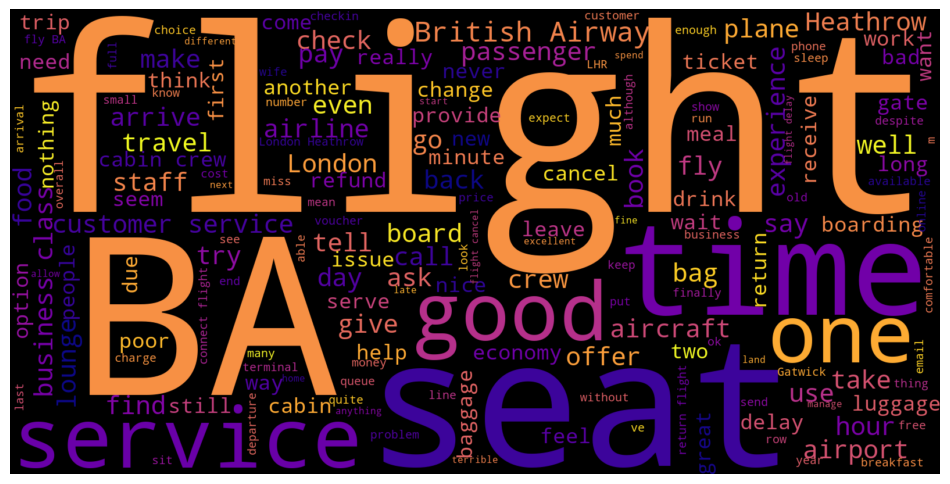

In [91]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a column named 'Lemma'

def show_wordcloud(data, background_color='white', stopwords=stopwords,colormap='viridis', max_words=200, max_font_size=100, scale=3, random_state=42):
    wordcloud = WordCloud(
        background_color=background_color,
        colormap=colormap,
        stopwords= stopwords,
        max_words=max_words,
        max_font_size=max_font_size,
        scale=scale,
        random_state=random_state
    )

    wordcloud = wordcloud.generate(' '.join(data))

    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


show_wordcloud(df['Lemma'], stopwords=stopwords,background_color='black', colormap='plasma', max_words=300, max_font_size=120, scale=4, random_state=42)


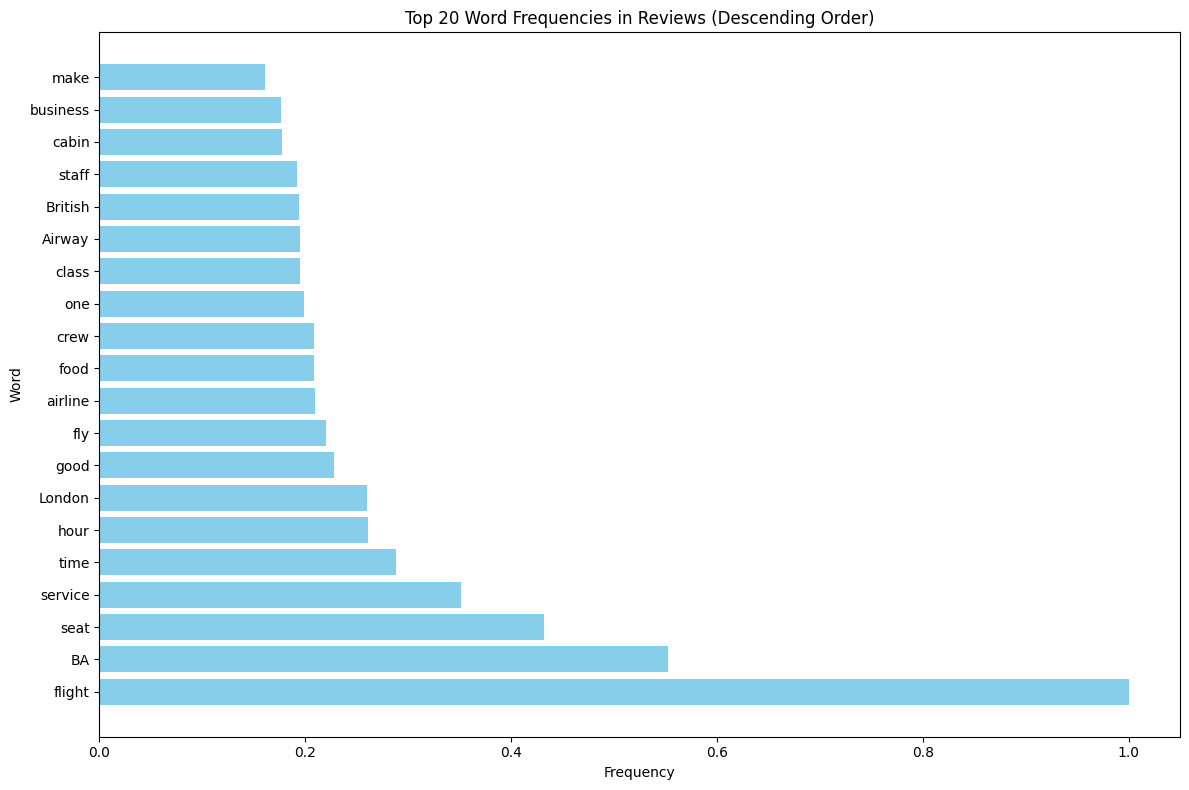

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with a column named 'Lemma'

# Concatenate all Lemmas into a single string
all_lemmas = ' '.join(df['Lemma'])

# Create a WordCloud object to get word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_lemmas)

# Get word frequencies from the WordCloud object
word_frequencies = wordcloud.words_

# Convert word frequencies to a DataFrame
df_word_frequencies = pd.DataFrame(list(word_frequencies.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df_word_frequencies_sorted = df_word_frequencies.sort_values(by='Frequency', ascending=False)

# Select only the top 20 rows
df_top_20 = df_word_frequencies_sorted.head(20)

# Plotting the bar chart for the top 20 word frequencies
plt.figure(figsize=(12, 8))
plt.barh(df_top_20['Word'], df_top_20['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Word Frequencies in Reviews (Descending Order)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


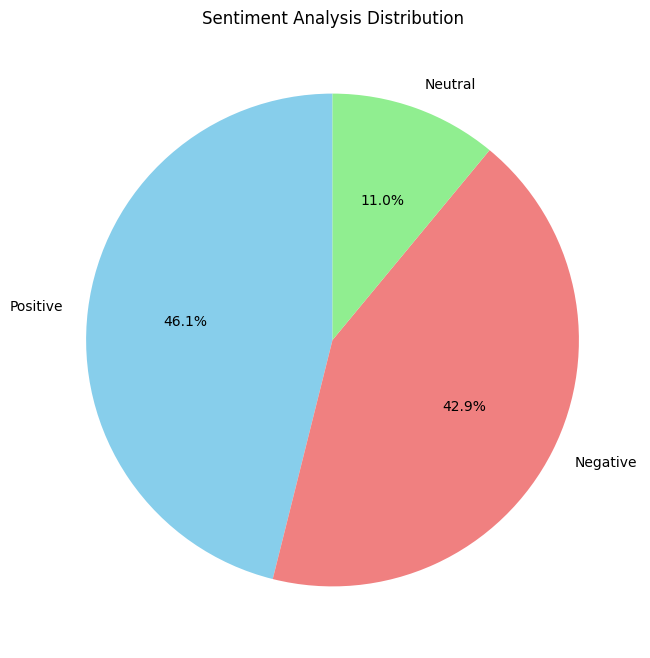

In [99]:
analysis_counts = df['Analysis'].value_counts(normalize=True) * 100
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink']

plt.figure(figsize=(8, 8))
plt.pie(analysis_counts, labels=analysis_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sentiment Analysis Distribution')
plt.show()


In [100]:
df.to_csv('data/Last_Version.csv', index=False)